从csv文件中读取数据，并存入numpy.ndarray。
分为两部分存储，一是年份时间，二是该年份发生事件的次数。

In [2]:
# -*- coding=utf-8 -*-
import numpy as np  
import datetime
import csv    #需要加载numpy和csv两个包  
csv_file=open('D:/Airplane_Crashes_and_Fatalities_Since_1908_.csv')    #打开文件  
csv_reader_lines = csv.reader(csv_file)    #用csv.reader读文件  
date_PyList=[]
for one_line in csv_reader_lines:
    date_PyList.append(one_line)    #逐行将读到的文件存入python的列表  
date_ndarray = np.array(date_PyList)    #将python列表转化为ndarray  
date=date_ndarray.T[0][1:]
print (date)    #切个片试一下是否成功
j=0
for i in date:
#     print ("当前的年份是:"+ i)
#     print (type(i))
    # 字符串转日期
    data_time = datetime.datetime.strptime(i, '%m/%d/%Y')
    year=data_time.year
    date[j]=year
    j=j+1
#     print (type(data_time),str(year))
print (type(date))
dictionkey, dictionval = np.unique(date, return_counts=True)
# print (unique)
# print (counts)
# diction = dict(zip(unique, counts))
# dictionval=list(diction.values())
# dictinoval=np.array(dictionval)
# dictionkey= list(diction.keys())
# dictinokey=np.array(dictionkey)
print (dictionkey)
print (len(dictionkey))
csv_file.close()

['09/17/1908' '07/12/1912' '08/06/1913' ... '06/01/2009' '06/07/2009'
 '06/08/2009']
<class 'numpy.ndarray'>
['1908' '1912' '1913' '1915' '1916' '1917' '1918' '1919' '1920' '1921'
 '1922' '1923' '1924' '1925' '1926' '1927' '1928' '1929' '1930' '1931'
 '1932' '1933' '1934' '1935' '1936' '1937' '1938' '1939' '1940' '1941'
 '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949' '1950' '1951'
 '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961'
 '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971'
 '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001'
 '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009']
98


首先通过plt来设置图表格式，之后利用data.plot()把图表显示出来。此图表纵坐标为在某年发生的事件次数，横坐标为年份。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pylab as mpl 
plt.subplots(1, 1,figsize=(20, 10))
for i in range(98):
    if (i%5)==0:
        continue
    else:
        dictionkey[i]=''
data = pd.Series(dictionval,index=dictionkey)
cc = (np.arange(98)+1)*2
#plt.autofmt_xdate()
plt.xticks(fontsize=30)
plt.yticks(fontsize=10)
# fig = plt.figure()
#生成axis对象
# ax = fig.add_subplot(111) #本案例的figure中只包含一个图表
#设置x轴为时间格式，这句非常重要，否则x轴显示的将是类似于‘736268’这样的转码后的数字格式
#ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
# plt.figsize(10,10)
# plt.xticks(range(dictionkey[0],dictionkey[1]+1,3),rotation=45)
# plt.xticks([1,2,3,4,5])
data.plot(kind='bar',color=plt.cm.jet(cc))   #基于data.plot
#fig.autofmt_xdate()
# ax.plot(dictionkey,dictionval,color='r')
# plt.show()

In [49]:
# import collections
# a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
# unique, counts = np.unique(a, return_counts=True)
# dict(zip(unique, counts))
# c = collections.Counter(a)
# print (type(c))

{0: 7, 1: 4, 2: 1, 3: 2, 4: 1}

In [110]:
# dateparse = lambda dates:pd.datetime.strptime(dates,'%m/%d/%Y')
# data = pd.read_excel('D:/Airplane_Crashes_and_Fatalities_Since_1908_.xlsx',encoding='utf-8',parse_dates=['Date'],date_parser=dateparse)
# data.head()

,Date,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


利用numpy给每一列命名，可以取得某一列。

In [4]:
csv_file=open('D:/Airplane_Crashes_and_Fatalities_Since_1908_.csv')    #打开文件  
csv_reader_lines = csv.reader(csv_file)    #用csv.reader读文件  
PyList=[]
for one_line in csv_reader_lines:
    PyList.append(one_line)    #逐行将读到的文件存入python的列表  
ndarray = np.array(PyList)    #将python列表转化为ndarray  
items=ndarray[0]
alldict={}
for i in range(12):
    alldict[items[i]]=ndarray.T[i][1:]
print (alldict['Operator'])

['Military - U.S. Army' 'Military - U.S. Navy' 'Private' ... 'Air France'
 'Strait Air' 'Military - Indian Air Force']


用Numpy进行数据清洗，统计失事死亡率，并求出最大发生事故的航空公司。

In [5]:
diction = dict(zip(alldict['Operator'], alldict['Fatalities']))
max_fatal=0
all_fatal=0
max_operator=''
count=0
for i in alldict['Fatalities']:
    if i=='':
        alldict['Fatalities'][count]='0'
    count=count+1
count=0
for i in diction:
    all_fatal=all_fatal+int(alldict['Fatalities'][count])
    if int(alldict['Fatalities'][count])>max_fatal:
        max_fatal=int(alldict['Fatalities'][count])
        max_operator=alldict['Operator'][count]
    count=count+1
print (max_operator,max_fatal)
print ('平均死亡人数：'+str(all_fatal/count))

Military - U.S. Air Force 155
平均死亡人数：16.669358094469114


['08/07/1943' '12/19/1943' '08/23/1944' '06/30/1945' '03/27/1945'
 '04/23/1945' '11/28/1947' '12/10/1947' '12/11/1947' '11/03/1948'
 '01/17/1949' '01/26/1950' '04/21/1950' '05/17/1950' '05/23/1950'
 '07/07/1950' '07/27/1950' '08/05/1950' '09/26/1950' '12/19/1950'
 '03/22/1951' '04/08/1951' '05/06/1951' '06/03/1951' '10/15/1951'
 '12/30/1951' '02/07/1952' '06/24/1952' '12/17/1953' '10/16/1952'
 '10/29/1952' '11/07/1952' '11/14/1952' '11/15/1952' '11/17/1952'
 '11/22/1952' '11/28/1952' '12/20/1952' '03/18/1953' '06/18/1953'
 '08/05/1953' '01/13/1954' '02/01/1954' '02/05/1954' '03/04/1954'
 '03/19/1954' '08/27/1954' '10/24/1954' '11/17/1955' '11/30/1955'
 '07/13/1956' '12/30/1956' '02/22/1957' '03/22/1957' '06/27/1958'
 '09/02/1958' '09/02/1958' '09/15/1958' '10/09/1958' '06/30/1959'
 '04/18/1960' '07/11/1960' '05/24/1961' '12/17/1960' '01/26/1961'
 '03/08/1962' '05/17/1962' '09/10/1962' '12/20/1962' '09/22/1963'
 '05/11/1964' '01/16/1965' '01/22/1965' '10/15/1973' '06/25/1965'
 '07/11/19

用Numpy统计发生最多事故航空的每年事故次数，并绘图

<class 'numpy.ndarray'>


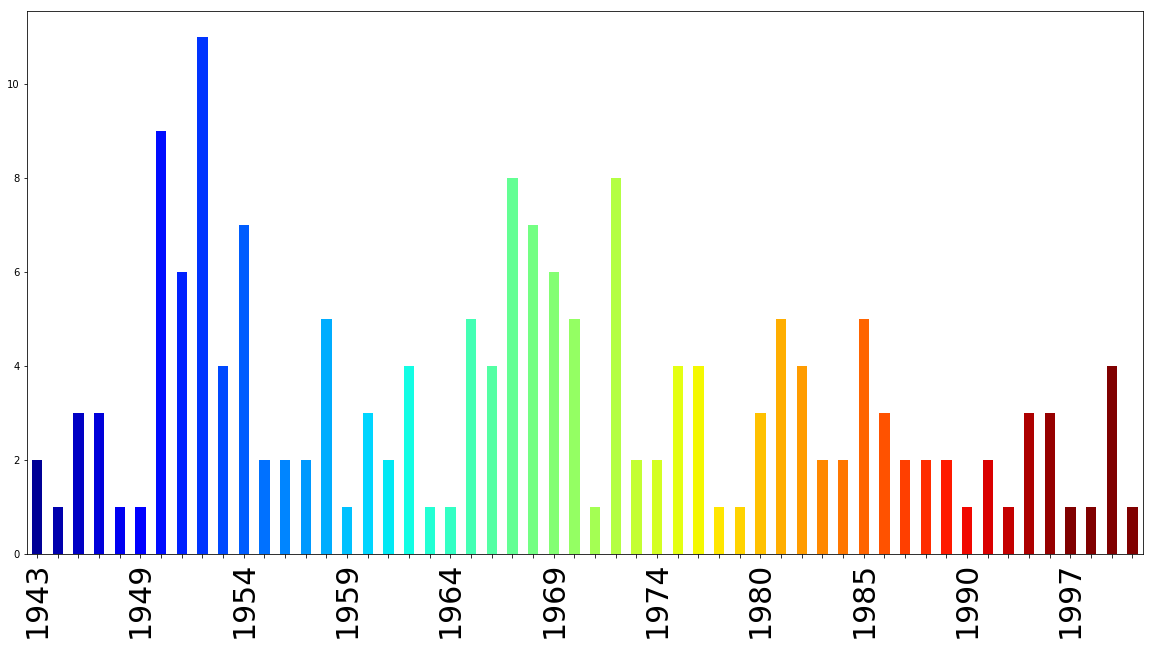

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pylab as mpl 
count=0
date=np.ndarray([])
for i in alldict['Operator']:
    if i =='Military - U.S. Air Force':
        date=np.append(date,alldict['Date'][count])
    count=count+1
date=date[1:]
j=0
for i in date:
    data_time = datetime.datetime.strptime(i, '%m/%d/%Y')
    year=data_time.year
    date[j]=year
    j=j+1
print (type(date))
dictionkey, dictionval = np.unique(date, return_counts=True)
# print (dictionkey)
# print (len(dictionkey))
plt.subplots(1, 1,figsize=(20, 10))
for i in range(54):
    if (i%5)==0:
        continue
    else:
        dictionkey[i]=''
data = pd.Series(dictionval,index=dictionkey)
cc = (np.arange(54)+1)*5
plt.xticks(fontsize=30)
plt.yticks(fontsize=10)
data.plot(kind='bar',color=plt.cm.jet(cc))   #基于data.plot